In [2]:
import numpy as np

data = {}
data["gauss"] = np.loadtxt("2D_gauss_clusters.txt", skiprows = 1, delimiter = ',')  
data["chameleon"] = np.loadtxt("chameleon_clusters.txt", skiprows = 1, delimiter = ',')  

In [3]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, min_change=0.01):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
      
    def get_centroids(self):
        return self.centroids
    
    def get_labels(self):
        return self.labels
    
    @staticmethod
    def __euclidean_distance(p1,p2):
        import math
        return math.sqrt(sum([(a - b) ** 2 for a, b in zip(p1, p2)]))
    
    def fit_predict(self, X):
        import random
        # generating random centroids
        rnd_idxs = random.sample(range(0, len(X)), self.n_clusters)
        self.centroids = [X[i] for i in rnd_idxs]
        # initializing labels to -1
        self.labels = np.full(len(X), -1)
        new_labels = np.full(len(X), -1)
        
        #  if less then min_changed_labels change label, stop the iterations
        min_changed_labels = min_change*len(X)
        curr_iter = 1
        
        while curr_iter <= self.max_iter:
            for i in range(len(X)):
                distances = [self.__euclidean_distance(X[i], self.centroids[j]) for j in range(len(self.centroids))]
                new_labels[i] = np.argmin(distances)
            for i in range(n_clusters):
                label_points = np.array([X[j] for j in range(len(X)) if new_labels[j] == i])
                self.centroids[i] = [np.mean(label_points[:,0]), np.mean(label_points[:,1])]
            
            changed_labels = sum([1 for i in range(len(new_labels)) if new_labels[i] != self.labels[i]])
            self.labels = new_labels
            if(changed_labels <= min_changed_labels):
                break
            curr_iter += 1
    
    def dump_to_file(self, filename):
        import csv
        with open(filename, mode='w') as f:
            f_writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_MINIMAL)
            f_writer.writerow(["Id", "ClusterId"])
            for i in range(len(self.labels)):
                f_writer.writerow([i, self.labels[i]])
        

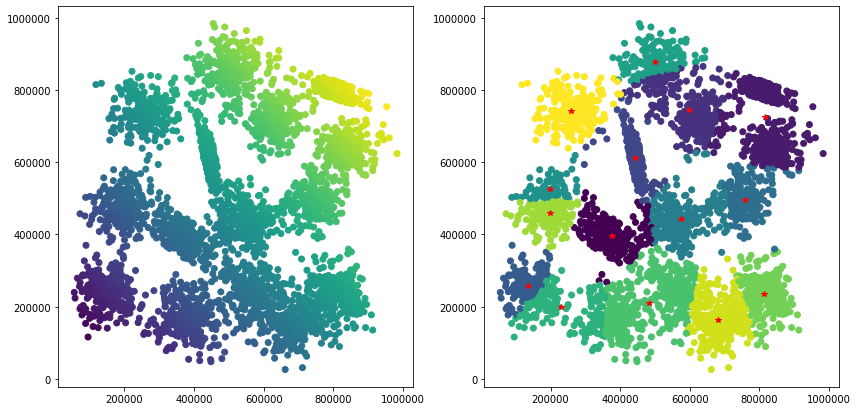

In [8]:
import matplotlib.pyplot as plt

x = data["gauss"][:,0]
y = data["gauss"][:,1]
colors = x + y
fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].scatter(x, y, c=colors)

n_clusters = 15
max_iter = 100
min_change = 0.01

k_means_operator = KMeans(n_clusters, max_iter, min_change)
k_means_operator.fit_predict(data["gauss"])
centroids = k_means_operator.get_centroids()
labels =  k_means_operator.get_labels()

k_means_operator.dump_to_file("gauss_clustering.csv")

ax[1].scatter(data["gauss"][:,0], data["gauss"][:,1], c=labels)
ax[1].plot(np.array(centroids)[:,0], np.array(centroids)[:,1], c='r', linestyle ='', marker = '*')
plt.show()

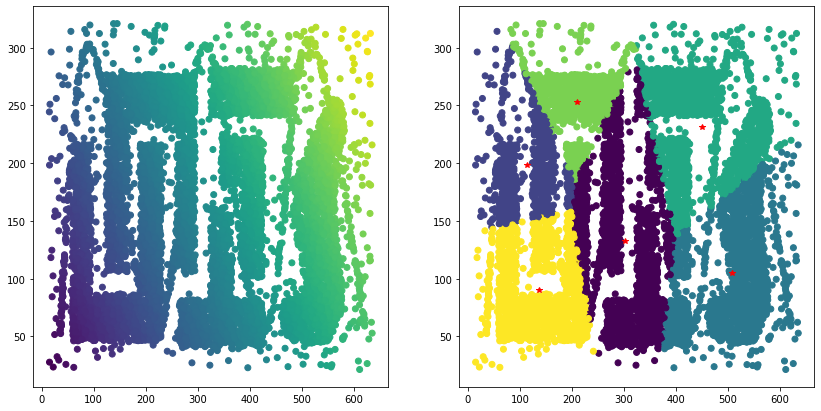

In [7]:
import matplotlib.pyplot as plt
# repeating the process for the chameleon dataset

x = data["chameleon"][:,0]
y = data["chameleon"][:,1]
colors = x + y
fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].scatter(x, y, c=colors)

n_clusters = 6
max_iter = 100
min_change = 0.01

k_means_operator = KMeans(n_clusters, max_iter, min_change)
k_means_operator.fit_predict(data["chameleon"])
centroids = k_means_operator.get_centroids()
labels =  k_means_operator.get_labels()

k_means_operator.dump_to_file("chameleon_clustering.csv")


ax[1].scatter(data["chameleon"][:,0], data["chameleon"][:,1], c=labels)
ax[1].plot(np.array(centroids)[:,0], np.array(centroids)[:,1], c='r', linestyle ='', marker = '*')
plt.show()